# Poissonligningen

## 1. Poissonligningen

La oss begynne med ligningen i bare en dimensjon, dvs

$$
u_{xx} = f(x)
$$

Vi kan løse ligningen ved å integrere to ganger.

### Eksempel

Hvis $f(x)=0$ har vi 
$$
u_x = \int f(x) dx = A\text{ og }u_{xx} = \int u_x dx = Ax + B,$$ 
hvor konstantene $A$ og $B$ bestemmes ut fra randbetingelsene.

(Ting blir fort mer komplisert i flere dimensjoner. )

### Randbetingelser

Ligningen 

$$
\Delta u(\vec{x}) = f(\vec{x}), \quad \vec{x}\in \Omega
$$ 

kommer typisk med randbetingelser:

1. dirichletbetingelser

$$u(\vec{x}) = g(\vec{x}), \quad \vec{x}\in \partial \Omega$$

hvor $\partial\Omega$ er randen på området $\Omega$ og hvor vi oppgir løsningen på randen.

2. neumannbetingelser

$$ \frac{\partial u}{\partial \vec{n}}(\vec{x}) = g(\vec{x}), \quad \vec{x}\in \partial \Omega$$

Hvor $\vec{n}$ er normalvektoren på randen. Altså, vi oppgir retningsderiverte til $u$ i retning ut av området $\Omega$.

Det er mulig å kombinere de to, enten med å oppgi Dirichlet betingelser på noen deler av randen og Neumann på andre deler, eller med å si at summen av $u$ og $\frac{\partial u}{\partial \vec{n}}$ er lik en oppgitt funksjon. Sistnevnte kalles for en *robinbetingelse*, men vi skal ikke se på denne muligheten, selv om den ikke skaper store utfordringer.

### Løsninger

Er geometrien pen nok kan vi fortsatt skrive løsningen som et integral. For eksempel, ligningen på enhetsdisken:

$$
u_{xx} + u_{yy} = f(x,y), \quad x^2 + y^2 < 1, \qquad u(x,y)=0, \quad x^2+ y^2 = 1
$$

har følgende løsning:

$$
u(\vec{x}) = \frac{1}{2\pi}\int_{||\vec{y}||\leq 1} \frac{f(\vec{y})d\vec{y}}{\log||\vec{x}-\vec{y}|| -\log||\frac{\vec{x}}{||\vec{x}||^2}-\vec{y}||}
$$

Deilig! Vi har bare noen få problemer:

1. Integralet er ikke så lett å løse
2. Vi må finne et nytt integral hvis vi endrer geometrien av randbetingelsene
3. For noen geometrier er det nesten like vanskelig å finne et slikt integral som å løse ligningen. 

### Eksempel:

Det kan vises at ligningen

$$
u_{xx}(x,y) + u_{yy}(x,y) = 0, \quad 0<x<1, 0<y<1
$$

med randbetingelser $u(x,0)=u(0,y)=u(1,y)=0$, $u(x,1)=\sin(\pi x)$ har løsning

$$
u(x,y) = \frac{\sin(\pi x)\sinh(\pi y)}{\sinh(\pi)}
$$

Her kan geometrien fortsett skape vanskeligheter, men i mindre grad.

## 2. Numeriske metoder: 1d randverdiproblem

La oss nå betrakte den ordinære differensialligningen

$$
\frac{d^2 u}{dt^2} + \omega^2 u = f(x), \quad u(0) = a, u(1) = b.
$$

Det blir det samme som en poissonligning i 1 dimensjon hvis vi har $\omega=0$.

Vi lært i PNS/matte 1 at vi kan løse ligningen ved å skrive det om som en $2\times 2$ førsteordensligning. Men resultatet blir litt vrient, da vi ender opp med randbetingelser på begge sider. Et alternativt strategi er å benytte Taylors teorem til å skrive:

$$
\frac{d^2 u}{dt^2} \approx \frac{1}{h^2} u(t+h) - 2u(t) + u(t-h) 
$$

### Oppgave

Sjekk at formelen stemmer ved å ta taylortilnærmingen til $u(t+h)$ og $u(t-h)$ rundt $t$.

Konsekvensen er at etter diskretisering, så erstatter vi $\frac{d^2 u}{dt^2}$ med den lineære avbildningen $L$:

$$
L: u_n \mapsto \frac{u_{n+1}-2u_n+u_{n-1}}{h^2}
$$

Som lineær avbildning kan den beskrives med en matrise, her har vi

$$
L = \frac{1}{h^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 & \ldots & 0 \\
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & & & & & \vdots \\
0 & \ldots & & & 1 & -2
\end{pmatrix}
$$

Nok en gang er det litt uklart hva som skjer ved randen. Vi skal se på det om kort tid, men først setter vi opp matrisen over i python.

### a) Programmering 1: en hurtigløsning

Først koder vi matrisa $L$. Det viser seg å være forbausende lett!

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

# antall punkter langs x-aksen, vi legger til endepunktene
m = 4
x = np.linspace(0,1,m+2)
h = x[1] - x[0]

# Her er nøkkelen: scipy.sparse.diags(...) bygger en matrise med -2 på hoveddiagonal, og 1 på tilstøtende diagonalene.
L = (1/h**2)*sp.diags([1,-2,1],[-1,0,1],shape=(m,m)).toarray()

print(L)


[[-50.  25.   0.   0.]
 [ 25. -50.  25.   0.]
 [  0.  25. -50.  25.]
 [  0.   0.  25. -50.]]


### b) Programmering 2: et alternativ

Vi kunne imidlertidig også ha satt opp matrisen selv men en for-løkka:

In [2]:
# initialiserer matrisen
L_for = np.zeros((m,m))

# løkka, går fra i=0 til i=m-2
for i in np.arange(m-1):
    L_for[i,i+1] = 1
    L_for[i+1,i] = 1
    L_for[i,i] = -2

# vi savner den siste -2 nederst til høyre
L_for[-1,-1] = -2

# del på h^2
L_for = L_for/(h**2)

print(L_for)

[[-50.  25.   0.   0.]
 [ 25. -50.  25.   0.]
 [  0.  25. -50.  25.]
 [  0.   0.  25. -50.]]


## 3. Randbetingelsene 1: Dirichlet

Nå ser vi på hvordan randbetingelsene påvirker det som skjer ved randen. Vi ser altså på ligningen 

$$
\frac{d^2 u}{dt^2} + \omega^2 u = f(x), \quad u(0) = a, u(1) = b.
$$

La $u_n = u(x_n)$. Vi må legge inn $u_0 = u(0) = a$ og $u_{m+1} = u(1) = b$. Legg merke til at den første ligningen burde egentlig ha vært

$$
\frac{u_0 - 2u_1 + u_2}{h^2} + \omega^2 u_1 = 0
$$

Men den første linjen til $Lu + \omega^2 u$ er egentlig bare lik

$$
\frac{- 2u_1 + u_2}{h^2} + \omega^2 u_1 = 0
$$

Vi må altså flytte $u_0$ til den andre side og få

$$
\frac{- 2u_1 + u_2}{h^2} + \omega^2 u_1 = \frac{u_0}{h^2} = -\frac{a}{h^2}
$$

Vi gjør det samme med den siste ligningen i $Lu + \omega^2 u = 0$. Vi ender da opp med

$$
L\vec{u} + \omega^2 \vec{u} = \vec{F}, \quad
\vec{F} = \begin{pmatrix}
-\frac{a}{h^2} \\
0 \\
\vdots \\
0 \\
-\frac{b}{h^2}
\end{pmatrix}
$$



In [3]:
import scipy.sparse.linalg as lin

omega = 1
a = -1
b = 1

# vi plusser L med omega^2 ganger identitetsmatrisen
A = L + (omega**2) * sp.eye(m)

F = np.zeros(m)

# hvis du vil ha f(x) ikke lik null skal den erstattes med
# F = f(x) for din funksjon f
# f eks, om du vil ha sin(x) skriver du F = np.sin(x)

F[0] = F[0] - a/(h**2)
F[-1] = F[-1] -b/(h**2)

# vi løser med sparse solver
U = lin.spsolve(A,F)

print(U)

[-0.61646118 -0.20826391  0.20826391  0.61646118]


C:\Users\berntj\AppData\Local\Temp\ipykernel_5616\2015060093.py:20: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U = lin.spsolve(A,F)


### Test

Så langt har vi tatt små verdier for $m$, for å illustrere prosessen. Vi prøver nå med større verdier, på ligningen 

$$
\frac{d^2 u}{dx^2} + \pi^2 u = 0, \quad u(0) = -1, u(1) = 1.
$$

Den generelle løsningen er   
$$
u = A\sin\pi x + B\cos\pi x,
$$

Vi har $u(0)=B$ og $u(1)=-B$, slik at den eksakte løsningen blir

$$
u = - \cos\pi x
$$


C:\Users\berntj\AppData\Local\Temp\ipykernel_5616\129419819.py:19: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U = lin.spsolve(A,F)


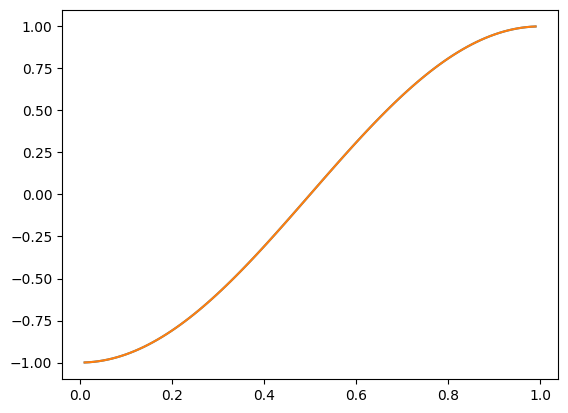

In [4]:
omega = np.pi
a = -1
b = 1

m = 100

x = np.linspace(0,1,m+2)
h = x[1] - x[0]

L = (1/h**2)*sp.diags([1,-2,1],[-1,0,1],shape=(m,m))

A = L + (omega**2) * sp.eye(m)

F = np.zeros(m)

F[0] = F[0] -a/(h**2)
F[-1] = F[1] -b/(h**2)

U = lin.spsolve(A,F)

# den eksakte løsningen
# vi skriver x[1:-1] fordi vi tar ikke med x_0 og x_m+1
U2 = - np.cos(omega*x[1:-1])

# plotter den numeriske løsningen i blå
plt.plot(x[1:-1],U)
# plotter den eksakte løsningen i oransje
plt.plot(x[1:-1],U2)

## 4. Andreordens ODE 2: Neumann randbetingelser

Hva skjer hvis vi tar $u'(0) = a, u'(1) = b$?.

Vi vet ikke lenger hva endpunktene $u_0$ og $u_{m+1}$ skal være. Løsningen er å legge dem til i $\vec{u}$. Vi trenger to ny ligninger. Den letteste løsning er å ta

$$
\frac{u_1 - u_0}{h} = u'(0) = a, \quad 
\frac{u_{m+1} - u_{m}}{h} = u'(1) = b,
$$


In [26]:
m = 10

x = np.linspace(0,1,m+2)
h = x[1] - x[0]

# matrisen er nå (m+2)x(m+2), siden vi må få med x_0 og x_m+1
L2 = (1/h**2)*sp.diags([1,-2,1],[-1,0,1],shape=(m+2,m+2))

# endrer datatypen til L2 slik at vi kan endre radene
L2 = sp.csr_matrix(L2)

# legger inn venstre randbetingelser i rad 1
L2[0,0] = -1/h
L2[0,1] = 1/h

# legger inn høyre randbetingelser i siste rad
L2[-1,-1] = 1/h
L2[-1,-2] = -1/h

print(L2.toarray())

[[ -11.   11.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 121. -242.  121.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  121. -242.  121.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  121. -242.  121.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  121. -242.  121.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  121. -242.  121.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  121. -242.  121.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  121. -242.  121.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  121. -242.  121.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  121. -242.  121.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.  121. -242.  121.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -11.   11.]]


### Eksempel: Løsning av andreordens ligningen

Vi har endt opp med et lineært system

$$
(L + \omega^2 I) u = 0.
$$

den løser vi under:

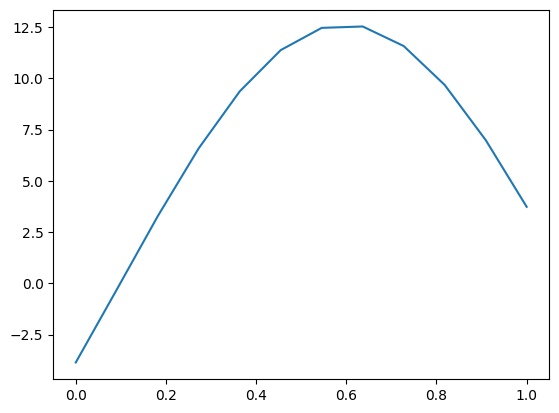

In [39]:
omega = np.pi

I = sp.eye(m+2)

I = sp.csr_matrix(I)


B = L2 + (omega**2) * I

G = np.zeros(m+2)
# om vi hadde en funksjon f(x) på høyre side av ligningen ville vi satt G = f(x) istedet

# setter inn randbetingelsen i vektoren G
G[0] = a
G[-1] = b

# løser systemet
V = lin.spsolve(B,G)

plt.plot(x,V)

### b) Poisson ligning ($\omega=0$)

Om $\omega=0$ har vi altså Poissonligningen

$$
u''(x) = 0, \quad u'(0)=a, u'(1)=b
$$

Den generelle løsning blir $u(x)=Ax + B$, slik at $u'(0)=u'(1)=A$. 

Vi har to situasjoner:

1. Hvis $a=b$ har vi uendelig mange løsninger $u(x)=Ax + B$, hvor vi kan velge $B$ som vi vil
2. Hvis $a\neq b$ har vi ingen løsninger.

Situasjonen gjenspeiles i den numeriske løsningen: Matrisen $L$ er ikke inverterbar, og ligningen

$$
L\vec{u} = \vec{F}
$$

har enten uendelig mange eller ingen løsninger, ut fra om $\vec{F}$ ligger i bilderommet til $L$, som er avhengig av verdiene til $a$ og $b$.

**Oppgave:**

Undersøk hva som skjer ved hjelp av koden under og det du husker fra lineær algebra i Matematikk 1.

In [40]:
# Har får vi ingen løsninger!

a = 1
b = 1

omega = 0

I = sp.eye(m+2)

I = sp.csr_matrix(I)

I[0,0]=0
I[-1,-1]=0

B = L2 + (omega**2) * I

G = np.zeros(m+2)

G[0] = a
G[-1] = b

V = lin.spsolve(B,G)

print(V)

[nan nan nan nan nan nan nan nan nan nan nan nan]


C:\Users\berntj\AppData\Local\Temp\ipykernel_5616\1671352213.py:22: MatrixRankWarning: Matrix is exactly singular
  V = lin.spsolve(B,G)


In [41]:
# Beregner egenverdier/egenvektorer til B.

everdi, evektor = np.linalg.eig(B.toarray())

print(everdi)

# Vi ser at den femte egenverdi er (tilnærmet) null

# Nullrommet til matrisa er altså
V = evektor[:,4]

[-4.74200988e+02 -4.45597810e+02 -4.00507716e+02 -3.42583625e+02
 -2.76518175e+02 -2.07663542e+02 -1.41597798e+02 -8.36728648e+01
 -3.85802333e+01 -9.96445969e+00 -9.14538490e-16  8.87211232e-01]


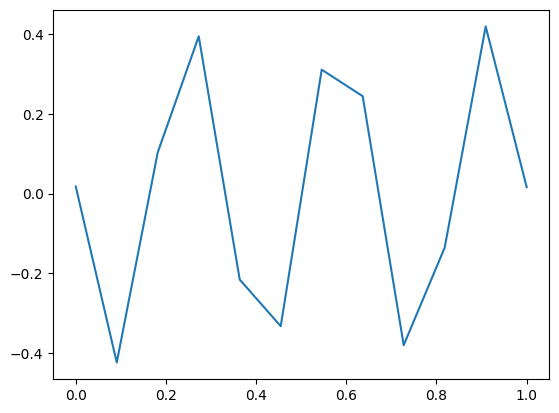

In [42]:
# Vi ser under at i dette tilfelle tilsvarer nullrommet en konstant funksjon f(x) = C

# Det tilsvarer forventningen at løsninger defineres kun opp til en konstant

plt.plot(x,V)

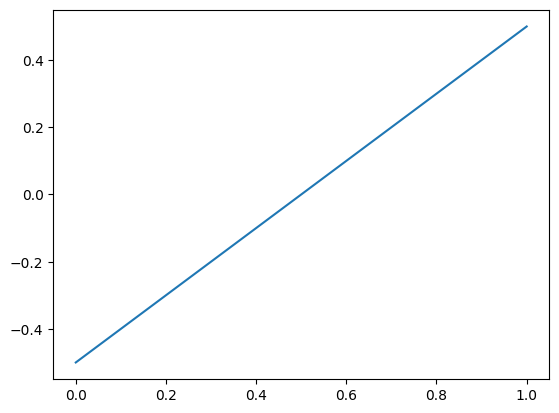

In [43]:
# Vi kan finne en minste kvadraters løsning under. Den beregner løsningen Lu = F med minst norm ||u|| om den finnes
# ellers beregner den u slik at normen ||Lu - F|| er minst mulig. 

V2, istop, itn, r1, r2 = lin.lsmr(B,G)[:5]

# minst kvadraters løsning
plt.plot(x,V2)

In [44]:
# gir størrelse på ||Lu-F||
print(r1)

2.295391881206365e-11
